# Analytics
The notebook will be used to clean, transform, analyze and visualize the data

# Libraries

In [275]:
import requests
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.io.json import json_normalize
from pandasql import sqldf

# Functions

In [276]:
def fDistNumCols(df, columns, ncols, axis):

    '''
    Plot distributions
    
    df - data frame
    columns - list of columns to plot
    ncols - number of columns
    axis - which axis will be used for plotting
    '''
    
    # Number of charts
    n = len(columns)

    # Number of columns
    ncols = 2

    # Number of rows
    nrows = math.ceil(n / ncols)

    # Define subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))

    # Loop through all subplots
    for i, j in zip(columns, axes.flat):
        if axis == 'x':
            sns.histplot(df, x=i,  ax=j)
        else:
            sns.histplot(df, y=i,  ax=j)

    # plt.tight_layout()

# Initialization

In [277]:
# Display all columns
pd.set_option('display.max_columns', None)

# Load from files

In [278]:
dfLeaguesCSV = pd.read_csv('raw_data/leagues.csv')
dfTeamsCSV = pd.read_csv('raw_data/teams.csv')

# Initialize empty data frames
dfPlayersCSV = pd.DataFrame()
dfPlayerStatsCSV = pd.DataFrame()

# Load all players files
for name in glob.glob('raw_data/players_*.csv'):
    dfPlayersTemp = pd.read_csv(name)
    dfPlayersCSV = pd.concat([dfPlayersCSV, dfPlayersTemp])
    
# Load all player stats files
for name in glob.glob('raw_data/player_stats_*.csv'):
    dfPlayerStatsTemp = pd.read_csv(name)
    dfPlayerStatsCSV = pd.concat([dfPlayerStatsCSV, dfPlayerStatsTemp])

## Columns description

# Clean and transform

## Join all data frames
There are several data frames. To perform analysis and build models we need to have just one. Hence we need to combine them.

In [279]:
# Merge players and player stats data sets
dfFootballCSV = dfPlayersCSV.merge(dfPlayerStatsCSV, left_on=['player_id','league_id','season_id'],\
                             right_on=['player_id','league_id','season_id'], suffixes=('', '_new'))

# Merge the result and teams data sets
dfFootballCSV = dfFootballCSV.merge(dfTeamsCSV, left_on=['team_id','league_id','season_id'],\
                             right_on=['team_id','league_id','season_id'], suffixes=('', '_new'))

# Merge the result and leagues data sets
dfFootballCSV = dfFootballCSV.merge(dfLeaguesCSV, left_on='league_id',\
                             right_on='league_id', suffixes=('', '_new'))

## Initial analysis

Sample

In [280]:
# You can change the index in the .iloc to see more columns
dfFootballCSV.iloc[:,0:].sample(5)

player_id     player_name player_firstname        player_lastname  \
13962      18751  Ivan Cavaleiro     Ivan Ricardo  Neves Abreu Cavaleiro   
16143      19217         A. King    Andrew Philip                   King   
50413      47287      Mikel Rico            Mikel            Rico Moreno   
33278      19264     Eros Pisano             Eros                 Pisano   
11438       8973     K. Van Hout          Kristof               Van Hout   

       player_age player_birth_date   player_birth_place player_birth_country  \
13962        30.0        1993-10-18  Vila Franca de Xira             Portugal   
16143        35.0        1988-10-29           Barnstaple              England   
50413        39.0        1984-11-04              Basauri                Spain   
33278        35.0        1987-03-31        Busto Arsizio                Italy   
11438        36.0        1987-02-09                 Geel              Belgium   

      player_nationality player_height player_weight  player_injured  \
13962           Portugal        175 cm         72 kg           False   
16143              Wales        194 cm         79 kg           False   
50413              Spain        179 cm         75 kg           False   
33278              Italy        185 cm         77 kg           False   
11438            Belgium        208 cm        110 kg           False   

                                            player_photo  league_id  \
13962  https://media-1.api-sports.io/football/players...         39   
16143  https://media-2.api-sports.io/football/players...         39   
50413  https://media-1.api-sports.io/football/players...        140   
33278  https://media-2.api-sports.io/football/players...        135   
11438  https://media-2.api-sports.io/football/players...        144   

       season_id  team_id      team_name  \
13962       2020       36         Fulham   
16143       2016       46      Leicester   
50413       2016      531  Athletic Club   
33278       2012      495          Genoa   
11438       2015      261   KVC Westerlo   

                                               team_logo         league_name  \
13962  https://media-2.api-sports.io/football/teams/3...      Premier League   
16143  https://media-2.api-sports.io/football/teams/4...      Premier League   
50413  https://media-3.api-sports.io/football/teams/5...             La Liga   
33278  https://media-2.api-sports.io/football/teams/4...             Serie A   
11438  https://media-1.api-sports.io/football/teams/2...  Jupiler Pro League   

      league_country                                        league_logo  \
13962        England  https://media-1.api-sports.io/football/leagues...   
16143        England  https://media-1.api-sports.io/football/leagues...   
50413          Spain  https://media-2.api-sports.io/football/leagues...   
33278          Italy  https://media-1.api-sports.io/football/leagues...   
11438        Belgium  https://media-3.api-sports.io/football/leagues...   

                                      league_flag  league_season  \
13962  https://media-1.api-sports.io/flags/gb.svg           2020   
16143  https://media-3.api-sports.io/flags/gb.svg           2016   
50413  https://media-1.api-sports.io/flags/es.svg           2016   
33278  https://media-2.api-sports.io/flags/it.svg           2012   
11438  https://media-2.api-sports.io/flags/be.svg           2015   

       games_appearences  games_lineups  games_minutes  games_number  \
13962               36.0           27.0         2474.0           NaN   
16143               23.0           15.0         1443.0           NaN   
50413               18.0            4.0          468.0           NaN   
33278               10.0            9.0          670.0           NaN   
11438                1.0            1.0           90.0           NaN   

      games_position  games_rating  games_captain  substitutes_in  \
13962       Attacker      6.731428          False             9.0   
16143     Midfielder      

Shape

In [281]:
dfFootballCSV.shape

(65880, 79)

Statistical info

In [282]:
dfFootballCSV.describe(include='all').style.set_sticky(axis="index")

Column types and null calues

In [283]:
dfFootballCSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65880 entries, 0 to 65879
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              65880 non-null  int64  
 1   player_name            65878 non-null  object 
 2   player_firstname       65878 non-null  object 
 3   player_lastname        65878 non-null  object 
 4   player_age             65867 non-null  float64
 5   player_birth_date      65867 non-null  object 
 6   player_birth_place     61114 non-null  object 
 7   player_birth_country   65878 non-null  object 
 8   player_nationality     65878 non-null  object 
 9   player_height          63635 non-null  object 
 10  player_weight          60662 non-null  object 
 11  player_injured         65880 non-null  bool   
 12  player_photo           65880 non-null  object 
 13  league_id              65880 non-null  int64  
 14  season_id              65880 non-null  int64  
 15  te

## Drop columns

In [284]:
# With all NA records
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[dfFootballCSV.isna().all()].to_list(), axis=1)

# With all False records
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[(dfFootballCSV == False).all()].to_list(), axis=1)

# All values the same
dfFootballCSV = dfFootballCSV.drop(dfFootballCSV.columns[dfFootballCSV.nunique() == 1].to_list(), axis=1)

## Replace values

### Find '\n    ' and replace with NaN

In [285]:
# Find coordinates of the cells
r, c = np.where(dfFootballCSV == '\n    ')

# Loop through each column and replace
for i in dfFootballCSV.columns[list(set(c))].to_list():
    dfFootballCSV.loc[dfFootballCSV[i] == '\n    ', i] = np.nan

### Weight and height

In [286]:
# Remove cm and \n from player_height
dfFootballCSV.player_height = dfFootballCSV.player_height.str.replace(' cm', '')

# Remove kg from player_weight
dfFootballCSV.player_weight = dfFootballCSV.player_weight.str.replace(' kg', '')

# Temporary fill NA with 0 to convert the columns to int
dfFootballCSV.player_height = dfFootballCSV.player_height.fillna(0)
dfFootballCSV.player_weight = dfFootballCSV.player_weight.fillna(0)

# Convert to int
dfFootballCSV.player_height = dfFootballCSV.player_height.astype('int32')
dfFootballCSV.player_weight = dfFootballCSV.player_weight.astype('int32')

### Escape character single quote

In [287]:
dfFootballCSV.venue_city = dfFootballCSV.venue_city.str.replace('&apos;', "'")

## Null values

Get all columns containing null values

Ignore *venue_address, team_code, games_rating*, they will be removed later

In [288]:
dfFootballCSV.columns[dfFootballCSV.isna().any()].to_list()

['player_name',
 'player_firstname',
 'player_lastname',
 'player_age',
 'player_birth_date',
 'player_birth_place',
 'player_birth_country',
 'player_nationality',
 'games_appearences',
 'games_lineups',
 'games_minutes',
 'games_position',
 'games_rating',
 'substitutes_in',
 'substitutes_out',
 'substitutes_bench',
 'shots_total',
 'shots_on',
 'goals_total',
 'goals_conceded',
 'goals_assists',
 'goals_saves',
 'passes_total',
 'passes_key',
 'passes_accuracy',
 'tackles_total',
 'tackles_blocks',
 'tackles_interceptions',
 'duels_total',
 'duels_won',
 'dribbles_attempts',
 'dribbles_success',
 'fouls_drawn',
 'fouls_committed',
 'cards_yellow',
 'cards_yellowred',
 'cards_red',
 'penalty_won',
 'penalty_commited',
 'penalty_scored',
 'penalty_missed',
 'penalty_saved',
 'team_code',
 'team_founded',
 'venue_address',
 'venue_city']

Fix

In [289]:
# Drop where no player name
dfFootballCSV = dfFootballCSV[~dfFootballCSV['player_name'].isna()]

# Drop where no birthdate/age
dfFootballCSV = dfFootballCSV[~dfFootballCSV['player_age'].isna()]

# Fill numneric columns with 0
dfFootballCSV[['games_appearences','games_lineups','games_minutes','substitutes_in','substitutes_out',\
    'substitutes_bench','shots_total','shots_on','goals_total','goals_conceded','goals_assists','goals_saves','passes_total',\
    'passes_key','passes_accuracy','tackles_total','tackles_blocks','tackles_interceptions','duels_total','duels_won',\
    'dribbles_attempts','dribbles_success','fouls_drawn','fouls_committed','cards_yellow','cards_yellowred','cards_red',\
    'penalty_won','penalty_commited','penalty_scored','penalty_missed','penalty_saved']]\
= dfFootballCSV[['games_appearences','games_lineups','games_minutes','substitutes_in','substitutes_out',\
    'substitutes_bench','shots_total','shots_on','goals_total','goals_conceded','goals_assists','goals_saves','passes_total',\
    'passes_key','passes_accuracy','tackles_total','tackles_blocks','tackles_interceptions','duels_total','duels_won',\
    'dribbles_attempts','dribbles_success','fouls_drawn','fouls_committed','cards_yellow','cards_yellowred','cards_red',\
    'penalty_won','penalty_commited','penalty_scored','penalty_missed','penalty_saved']].fillna(0)

# Populate missing venue_city
dfFootballCSV.loc[dfFootballCSV.team_name == 'Beerschot', 'venue_city'] = 'Antwerp'
dfFootballCSV.loc[dfFootballCSV.team_name == 'Kryvbas', 'venue_city'] = 'Kryvyi Rih'

# Populate missing team_founded
dfFootballCSV.loc[dfFootballCSV.team_name == 'Tondela', 'team_founded'] = '1933'
dfFootballCSV.loc[dfFootballCSV.team_name == 'Moreirense', 'team_founded'] = '1938'
dfFootballCSV.loc[dfFootballCSV.team_name == 'U. Madeira', 'team_founded'] = '1913'
dfFootballCSV.loc[dfFootballCSV.team_name == 'Rukh Vynnyky', 'team_founded'] = '2003'
dfFootballCSV.loc[dfFootballCSV.team_name == 'Kolos Kovalivka', 'team_founded'] = '2012'
dfFootballCSV.loc[dfFootballCSV.team_name == 'Fatih Karagümrük', 'team_founded'] = '1926'

# Populate missing games_position
dfFootballCSV.loc[dfFootballCSV.player_id == 70525, 'games_position'] = 'Midfielder'

# Populate missing player_birth_place with player_birth_country
dfFootballCSV.loc[dfFootballCSV.player_birth_place.isna(), 'player_birth_place'] = dfFootballCSV[dfFootballCSV.player_birth_place.isna()]\
    .apply(lambda x: x.player_birth_country, axis=1)

# Populate missing player_height and player_weight

# Calculate average height by nationality
dfTempAvgHeight = dfFootballCSV[dfFootballCSV.player_height > 0].groupby(['player_nationality','games_position'])[['player_height']].mean().reset_index()
dfTempAvgWeight = dfFootballCSV[dfFootballCSV.player_weight > 0].groupby(['player_nationality','player_age','games_position'])[['player_weight']].mean().reset_index()

# Round values
dfTempAvgHeight.player_height = round(dfTempAvgHeight.player_height)
dfTempAvgWeight.player_weight = round(dfTempAvgWeight.player_weight)

# Merge to the main data frame
dfFootballCSV = dfFootballCSV.merge(dfTempAvgHeight, how='left', on=['player_nationality','games_position'], suffixes=('', '_new'))
dfFootballCSV = dfFootballCSV.merge(dfTempAvgWeight, how='left', on=['player_nationality','player_age','games_position'], suffixes=('', '_new'))

# Fillna where no matches found
dfFootballCSV.player_height_new = dfFootballCSV.player_height_new.fillna(0)
dfFootballCSV.player_weight_new = dfFootballCSV.player_weight_new.fillna(0)

# Replace 0 with average by nationality
dfFootballCSV.loc[dfFootballCSV.player_height == 0, 'player_height'] = dfFootballCSV[dfFootballCSV.player_height == 0].player_height_new
dfFootballCSV.loc[dfFootballCSV.player_weight == 0, 'player_weight'] = dfFootballCSV[dfFootballCSV.player_weight == 0].player_weight_new

# Replace with total average where average by nationality can't be found
dfFootballCSV.loc[dfFootballCSV.player_height == 0, 'player_height'] = round(dfFootballCSV.player_height.mean())
dfFootballCSV.loc[dfFootballCSV.player_weight == 0, 'player_weight'] = round(dfFootballCSV.player_weight.mean())

## Drop "_new" columns

In [290]:
# Get all columns which contain _new in the name amd drop them
dfFootballCSV = dfFootballCSV.drop(list(filter(lambda x: '_new' in x, dfFootballCSV.columns)), axis=1)

## Drop duplicates

Theoretically we should get unique records for *player_id,team_id,league_id,season_id*. However, duplicated records are cauased by several tournaments, it is expected.

In [291]:
# Group by columns combination of which should be unique
dfTempGroup = dfFootballCSV.groupby(['player_id','team_id','league_id','season_id'])[['player_name']].count().reset_index()

# Get duplicates
dfTempGroup[dfTempGroup.player_name > 1]

player_id  team_id  league_id  season_id  player_name
123           17      165         78       2018            2
305           42      242         94       2021            2
531           74      504        135       2019            2
1894         256      529        140       2021            2
1904         257      497        135       2012            2
...          ...      ...        ...        ...          ...
64051     275542     3623        333       2020            2
64090     277249     6501        333       2021            2
64797     306196     6501        333       2021            2
64803     306354     3628        333       2021            2
64974     319511      733        144       2021            2

[382 rows x 5 columns]

Get records where all columns are duplicates

In [292]:
dfFootballCSV[dfFootballCSV.duplicated()]

player_id       player_name          player_firstname  player_lastname  \
45554      41264  Zainadine Júnior  Zainadine Abdula Mulungo  Chavango Júnior   
45555      41264  Zainadine Júnior  Zainadine Abdula Mulungo  Chavango Júnior   
45556      41264  Zainadine Júnior  Zainadine Abdula Mulungo  Chavango Júnior   
55685      13548         M. Cortés                  Mauricio    Cortés Armero   
55686      13548         M. Cortés                  Mauricio    Cortés Armero   

       player_age player_birth_date player_birth_place player_birth_country  \
45554        35.0        1988-06-24             Maputo           Mozambique   
45555        35.0        1988-06-24             Maputo           Mozambique   
45556        35.0        1988-06-24             Maputo           Mozambique   
55685        26.0        1997-02-09             Tumaco             Colombia   
55686        26.0        1997-02-09             Tumaco             Colombia   

      player_nationality  player_height  player_weight  \
45554         Mozambique            178             70   
45555         Mozambique            178             70   
45556         Mozambique            178             70   
55685           Colombia            172             66   
55686           Colombia            172             66   

                                            player_photo  league_id  \
45554  https://media-2.api-sports.io/football/players...         94   
45555  https://media-2.api-sports.io/football/players...         94   
45556  https://media-2.api-sports.io/football/players...         94   
55685  https://media-1.api-sports.io/football/players...        333   
55686  https://media-1.api-sports.io/football/players...        333   

       season_id  team_id team_name  \
45554       2015      225  Nacional   
45555       2015      225  Nacional   
45556       2015      225  Nacional   
55685       2017     3617   Karpaty   
55686       2017     3617   Karpaty   

                                               team_logo     league_name  \
45554  https://media-3.api-sports.io/football/teams/2...   Primeira Liga   
45555  https://media-3.api-sports.io/football/teams/2...   Primeira Liga   
45556  https://media-3.api-sports.io/football/teams/2...   Primeira Liga   
55685  https://media-1.api-sports.io/football/teams/3...  Premier League   
55686  https://media-2.api-sports.io/football/teams/3...  Premier League   

      league_country                                        league_logo  \
45554       Portugal  https://media-2.api-sports.io/football/leagues...   
45555       Portugal  https://media-2.api-sports.io/football/leagues...   
45556       Portugal  https://media-2.api-sports.io/football/leagues...   
55685        Ukraine  https://media-2.api-sports.io/football/leagues...   
55686        Ukraine  https://media-2.api-sports.io/football/leagues...   

                                      league_flag  league_season  \
45554  https://media-3.api-sports.io/flags/pt.svg           2015   
45555  https://media-3.api-sports.io/flags/pt.svg           2015   
45556  https://media-3.api-sports.io/flags/pt.svg           2015   
55685  https://media-1.api-sports.io/flags/ua.svg           2017   
55686  https://media-1.api-sports.io/flags/ua.svg           2017   

       games_appearences  games_lineups  games_minutes games_position  \
45554               20.0           20.0         1766.0       Defender   
45555               20.0           20.0         1766.0       Defender   
45556               20.0           20.0         1766.0       Defender   
55685                3.0            0.0           62.0       Attacker   
55686                3.0            0.0           62.0       Attacker   

       games_rating  substitutes_in  substitutes_out  substitutes_bench  \
45554        7.0375             0.0              0.0                0.0   
45555        7.0375             0.0              0.0                0.0   
45556        7.0375             0.0              0.0 

Just 5 records, we can just remove them

In [293]:
dfFootballCSV = dfFootballCSV.drop_duplicates()

In [294]:
# # Combine all records by player
# listGroupBy = ['player_id','player_name','player_firstname','player_lastname','player_age','player_birth_date',\
#     'player_birth_place','player_birth_country','player_nationality','player_height','player_weight','player_photo',\
#     'league_id','season_id','team_id','team_name','team_logo','league_name','league_country','league_logo','league_flag',\
#     'league_season','games_position','team_code','team_country','team_founded','venue_id','venue_name','venue_address',\
#     'venue_city','venue_capacity','venue_surface','venue_image','country_name','country_code','country_flag']

# listGroupBy = ['player_id','team_id','league_id','season_id']

# dictGroupBy = {'games_appearences': 'sum', 'games_lineups': 'sum', 'games_minutes': 'sum', 'games_rating': 'mean',\
#     'substitutes_in': 'sum', 'substitutes_out': 'sum', 'substitutes_bench': 'sum', 'shots_total': 'sum', 'shots_on': 'sum',\
#     'goals_total': 'sum', 'goals_conceded': 'sum', 'goals_assists': 'sum', 'goals_saves': 'sum', 'passes_total': 'sum',\
#     'passes_key': 'sum', 'passes_accuracy': 'mean', 'tackles_total': 'sum', 'tackles_blocks': 'sum',\
#     'tackles_interceptions': 'sum', 'duels_total': 'sum', 'duels_won': 'sum', 'dribbles_attempts': 'sum',\
#     'dribbles_success': 'sum', 'fouls_drawn': 'sum', 'fouls_committed': 'sum', 'cards_yellow': 'sum', 'cards_yellowred': 'sum',\
#     'cards_red': 'sum', 'penalty_won': 'sum', 'penalty_commited': 'sum', 'penalty_scored': 'sum', 'penalty_missed': 'sum',\
#     'penalty_saved': 'sum'}

# df1 = dfFootballCSV.groupby(listGroupBy).agg(dictGroupBy).reset_index()

## Drop rows with negative values

In [295]:
# Find index of rows with negative values
r, c = np.where(dfFootballCSV.select_dtypes(include=np.number) < 0)

# Drop those rows
dfFootballCSV = dfFootballCSV.drop(r)

## Search for unexpected values

### Check value counts for all columns

In [296]:
for i in dfFootballCSV.columns:
    print(i)
    print(dfFootballCSV[i].value_counts())
    print('-'*30)

player_id
22240    16
18833    15
50180    15
30536    15
21096    15
         ..
36884     1
38817     1
37006     1
93105     1
13142     1
Name: player_id, Length: 20301, dtype: int64
------------------------------
player_name
Paulinho         37
Marcelo          34
A. Turan         29
A. Traoré        28
João Pedro       25
                 ..
S. Aldrovandi     1
M. Pamić          1
S. Moschin        1
M. Ardemagni      1
L. Guaycochea     1
Name: player_name, Length: 19755, dtype: int64
------------------------------
player_firstname
Daniel                 322
Oleksandr              298
David                  274
Marco                  271
Thomas                 250
                      ... 
Mauricio Ezequiel        1
Nicolás Santiago         1
Ignácio                  1
Mauro Abel               1
Guilain Désiré Wato      1
Name: player_firstname, Length: 9420, dtype: int64
------------------------------
player_lastname
Traoré            99
da Silva          99
Yılmaz            

### Distributions of numeric columns

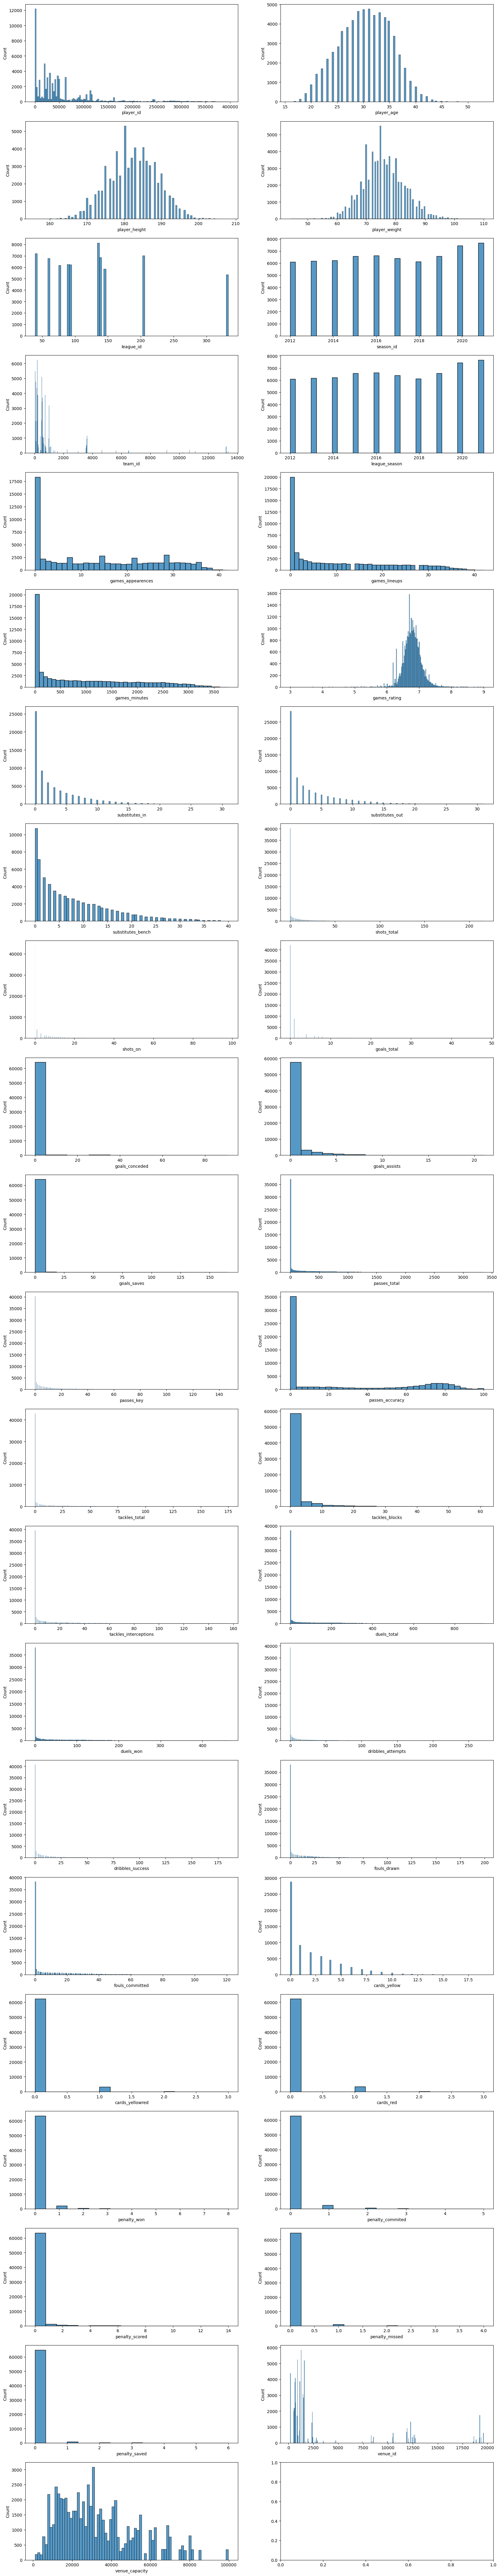

In [297]:
fDistNumCols(dfFootballCSV, dfFootballCSV.select_dtypes(include=np.number).columns, 2, 'x')

### Distributions of categorical columns

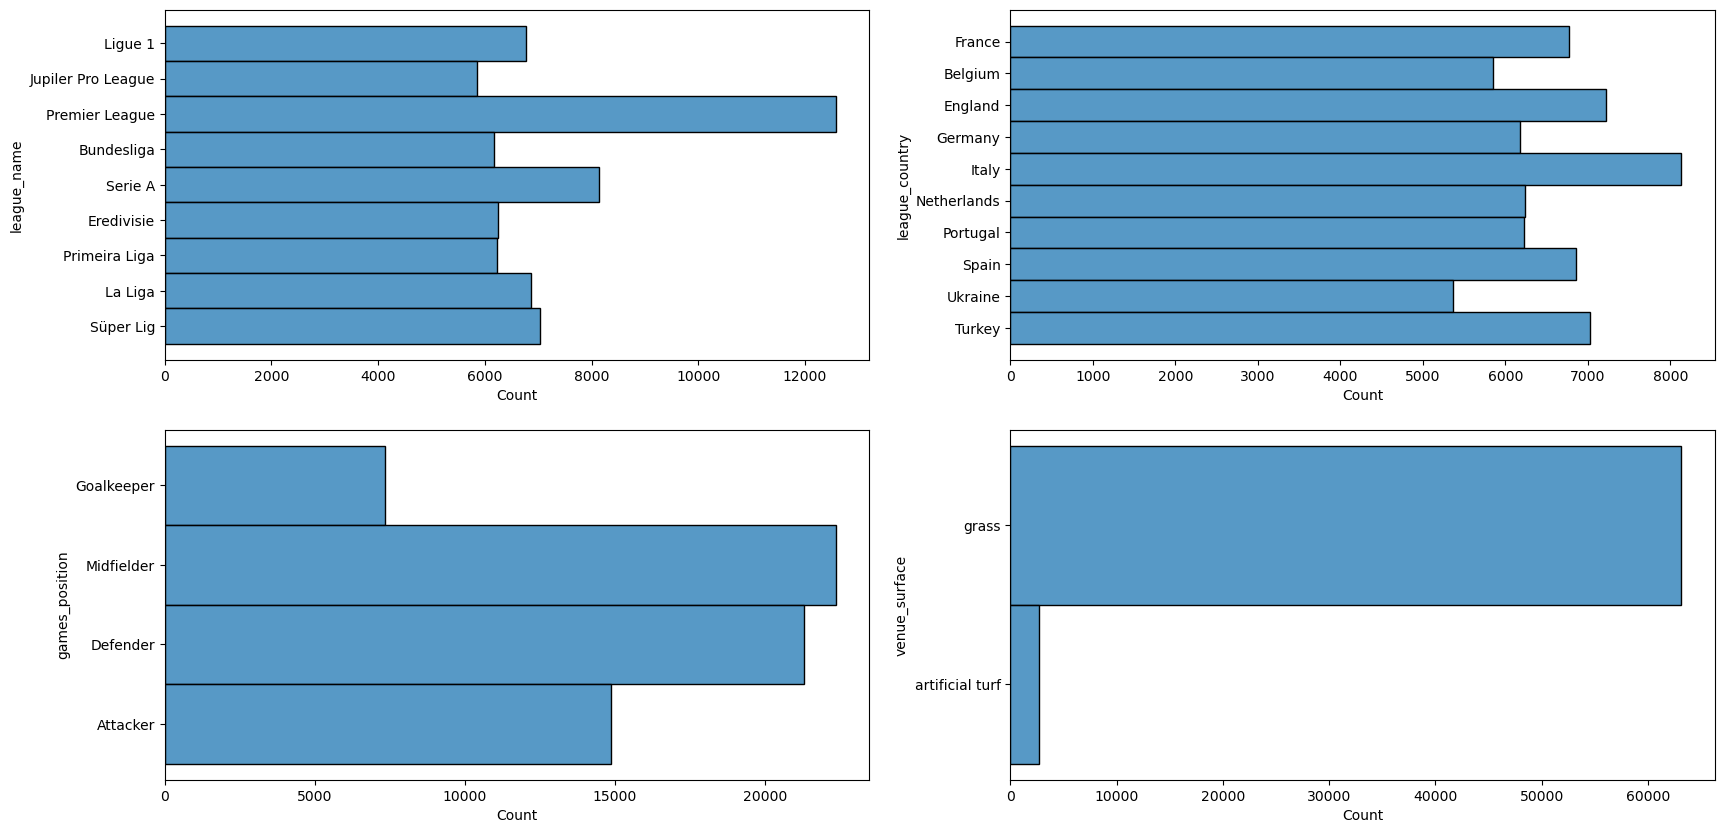

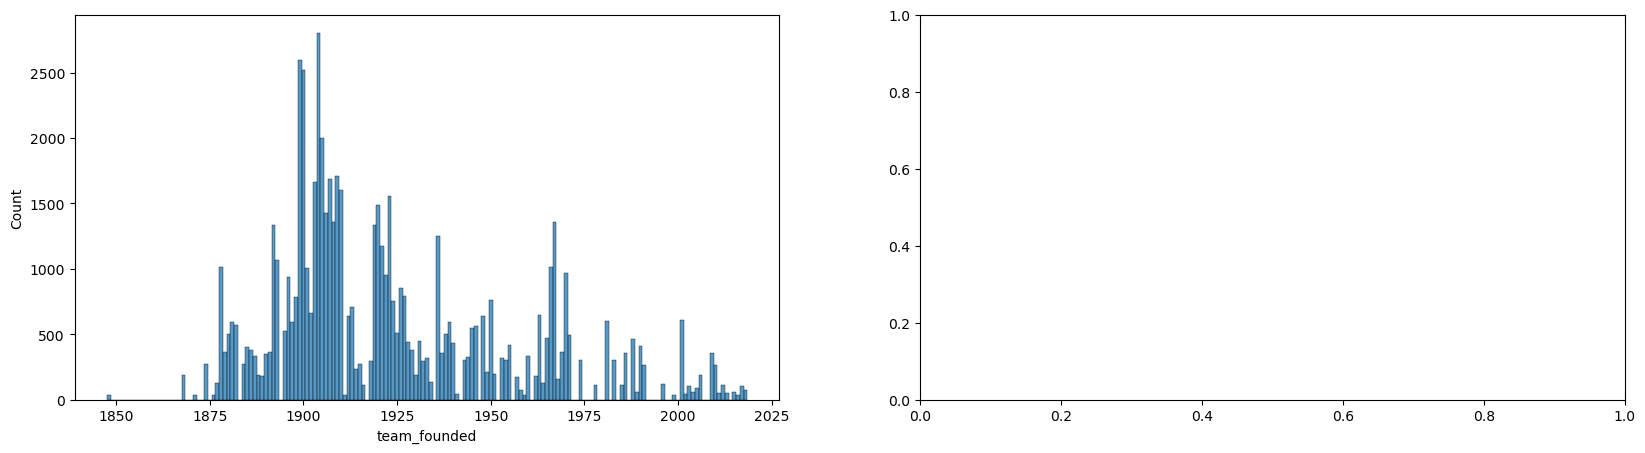

In [298]:
# Get all non-numeric columns
dfFootballCSV.select_dtypes(include=object).columns

# Select columns with low number of possible values
listDistNumCols = ['league_name','league_country','games_position','venue_surface']

fDistNumCols(dfFootballCSV, listDistNumCols, 2, 'y')
fDistNumCols(dfFootballCSV, ['team_founded'], 2, 'x')

## Convert data types

Nothing needs to be converted, player_birth_date won't be used

In [299]:
# Convert player_birth_date
# dfFootballCSV['player_birth_date'] = pd.to_datetime(dfFootballCSV['player_birth_date'])

## Drop the fields not relevant to machine learning

- **player_name, player_firstname, player_lastname, player_photo, team_logo, league_flag, country_flag, league_logo, venue_image** - not relevant
- **player_birth_date** - can be calculated based on player_age
- **team_name, team_code** - represents the same data as team_id
- **league_name, league_country, team_country, country_name, country_code** - represents the same data as league_id
- **venue_name, venue_address** - represents the same data as venue_id
- **league_season** - represents the same data as league_id
- **games_rating** - a lot of missing values
- **season_id** - won't be able to use in a prediction, we can't go in the past. Also, it doesn't matter which year players scored a certain amount of goals.

In [300]:
dfFootball = dfFootballCSV.drop(['player_name','player_firstname','player_lastname','player_birth_date','player_photo',\
    'team_name','team_logo','league_name','league_country','league_logo','league_flag','team_code','team_country','venue_name',\
    'venue_address','venue_image','country_flag','country_name','country_code','league_season','games_rating','season_id'\
    ], axis=1)

## Conclusion

> - I dropped the columns that can't be used for the modeling: the majority of NA values that can't be populated, all NA values, the same value, not relevant, IDs, names, URLs.
> - Filled NA values.
> - Removed duplicated rows.
> - Removed rows with negative values.
> - Cleaned records with the escape characters.
> - Converted data types.
> - Checked distributions.

# Analytics

## Distributions of aggregated features

It allows us to check if there are any issues with the data. 

### Distribution of number of teams in leagues for all seasons
The number of teams in any league and season should be between 10 and 25. The majority of leagues have 18-20 teams. The result is expected.

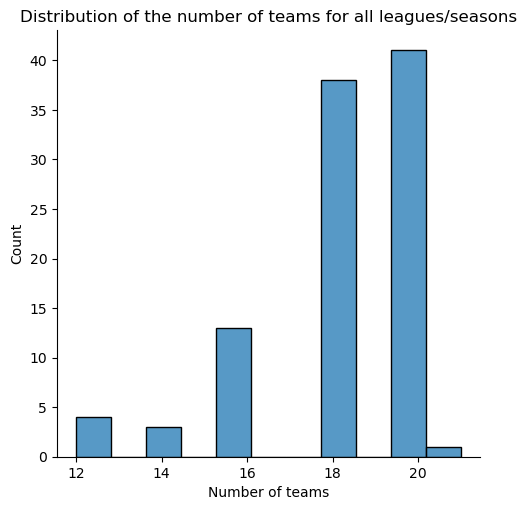

In [301]:
# Group by country and season
sns.displot(dfFootball.groupby(['league_id','season_id'])['team_id'].nunique())\
    .set(xlabel='Number of teams', title='Distribution of the number of teams for all leagues/seasons')

### Distribution of players in teams

The number of players in any team should be between 20 and 50. The majority of teams have 30-40 players. The result is expected.

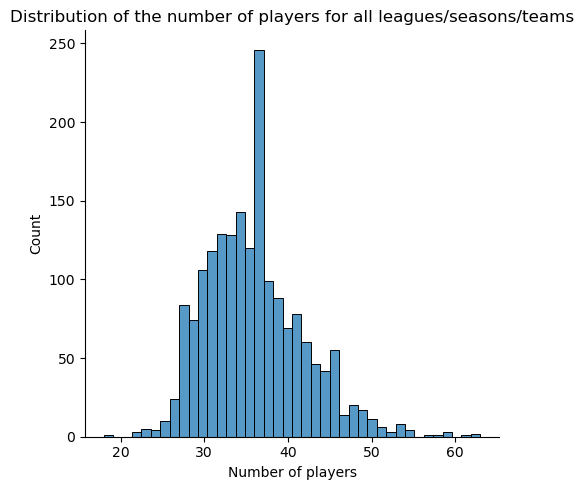

In [302]:
# Group by country, season and team
sns.displot(dfFootball.groupby(['league_id','season_id','team_id'])['player_id'].nunique())\
    .set(xlabel='Number of players', title='Distribution of the number of players for all leagues/seasons/teams')

plt.tight_layout()

## Relationship between features

### venue_city VS venue_id

I want to see if there is a 1-to-1 relation or there are a lot of different stadiums in the same city. Should we remove venue_id?

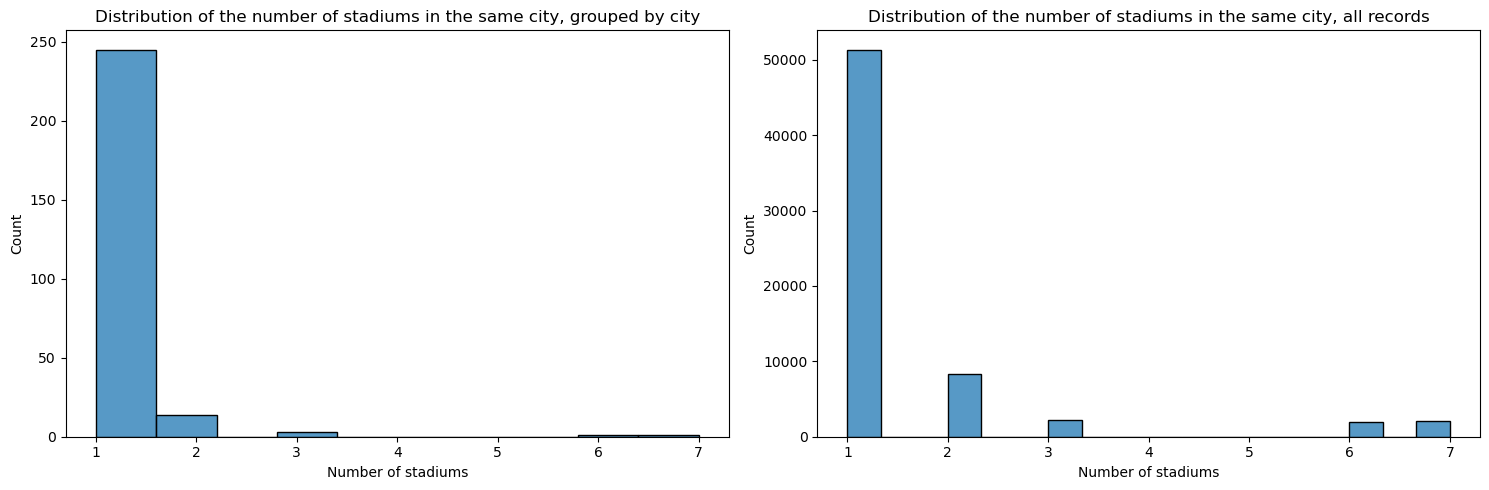

In [303]:
# Define subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Get number of stadiums in the same city, plot histogram for unique number of cities
sns.histplot(dfFootball.groupby(['venue_city'])['venue_id'].nunique(), ax=ax[0])\
    .set(xlabel='Number of stadiums', title='Distribution of the number of stadiums in the same city, grouped by city')

# Get number of stadiums in the same city, plot histogram for all records
sns.histplot(dfFootball.merge(dfFootball.groupby(['venue_city'])[['venue_id']].nunique().reset_index(), on=['venue_city'],\
    suffixes=('', '_count'), copy=False)['venue_id_count'], ax=ax[1])\
    .set(xlabel='Number of stadiums', title='Distribution of the number of stadiums in the same city, all records')

plt.tight_layout()

We do not need to remove venue_id:
- The plot on the left shows there are several cities with more than one statium (2, 3, 6, 7).
- The plot on the right proves there are a lot of records with the cities having more than one stadium.

### venue_id VS team_id

Check if venue_id is unique for each team_id, if yes then remove that field.

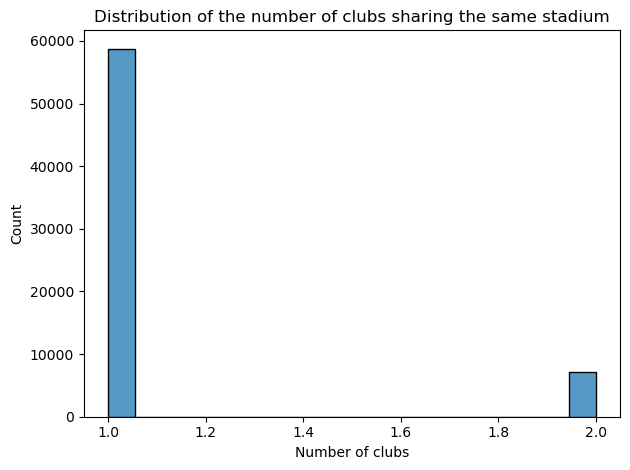

In [304]:
# Get number of clubs sharing the same stadium, plot histogram for all records
sns.histplot(dfFootball.merge(dfFootball.groupby(['venue_id'])[['team_id']].nunique().reset_index(), on=['venue_id'],\
    suffixes=('', '_count'), copy=False)['team_id_count'])\
    .set(xlabel='Number of clubs', title='Distribution of the number of clubs sharing the same stadium')

plt.tight_layout()

We can observe the same picture as the above. Hence we do not need to remove it.

## Relationship between features and target columns

The below helps to understand every single feature, and how it impacts the target variable. I will use scatterplot for that. One plot (on the left) will show all records and the other one (on the right) will show the mean of goals scored for each value.

In [305]:
def fScatter(df, columns_init, target, ncols, figsizew, figsizeh):

    '''
    Plot distributions
    
    df - data frame
    columns_init - list of columns to plot
    ncols - number of columns
    target - the target column which scatterplot will be plotted against
    figsizew - width of the plot
    figsizeh - height of the plot
    '''
    
    # Duplicate the array to plot 2 charts
    columns = np.array(columns_init).repeat(2)
    
    # Number of charts
    n = len(columns)

    # Number of rows
    nrows = math.ceil(n / ncols)

    # Define subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsizew, figsizeh * nrows))
    
    # 
    odd = True
    
    # Loop through all subplots
    for i, j in zip(columns, axes.flat):
        if odd:
            sns.scatterplot(data=df, x=i, y=target,  ax=j).set(title='Total')
            odd = False
        else:
            sns.scatterplot(data=dfFootball.groupby(i)[[target]].mean().reset_index(), x=i, y=target,  ax=j).set(title='Average')
            odd = True

In [306]:
# Used additionaly one by one, it takes a lot of time to run
# values = np.vstack([dfFootball["goals_total"], dfFootball["season_id"]])
# kernel = stats.gaussian_kde(values)(values)
# sns.scatterplot(data=dfFootball, x='season_id', y='goals_total', c=kernel, cmap="viridis")

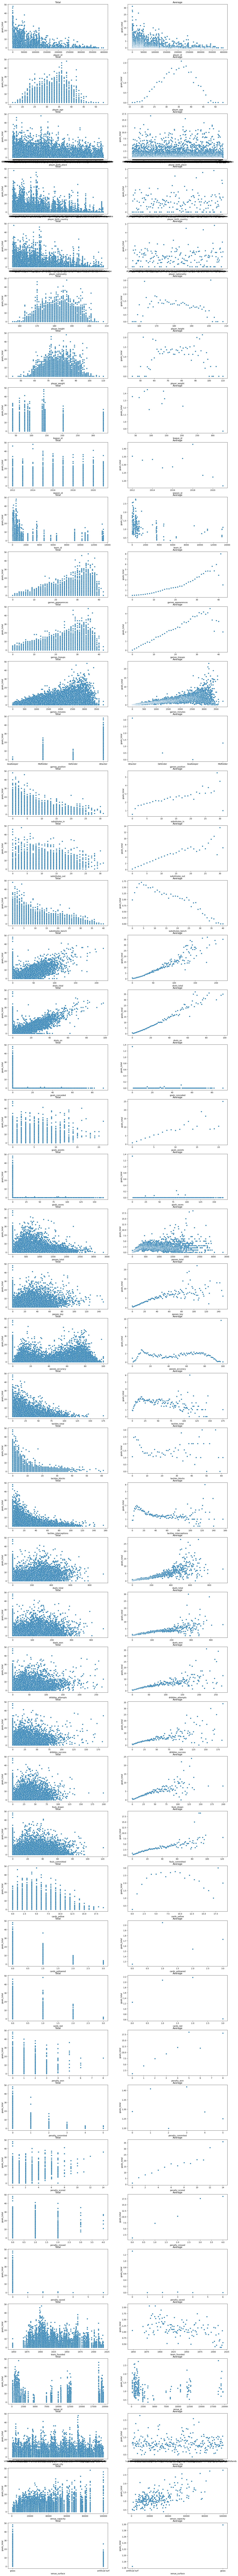

In [307]:
fScatter(dfFootball, dfFootball.drop('goals_total', axis=1).columns.to_list(), 'goals_total', 2, 20, 5)

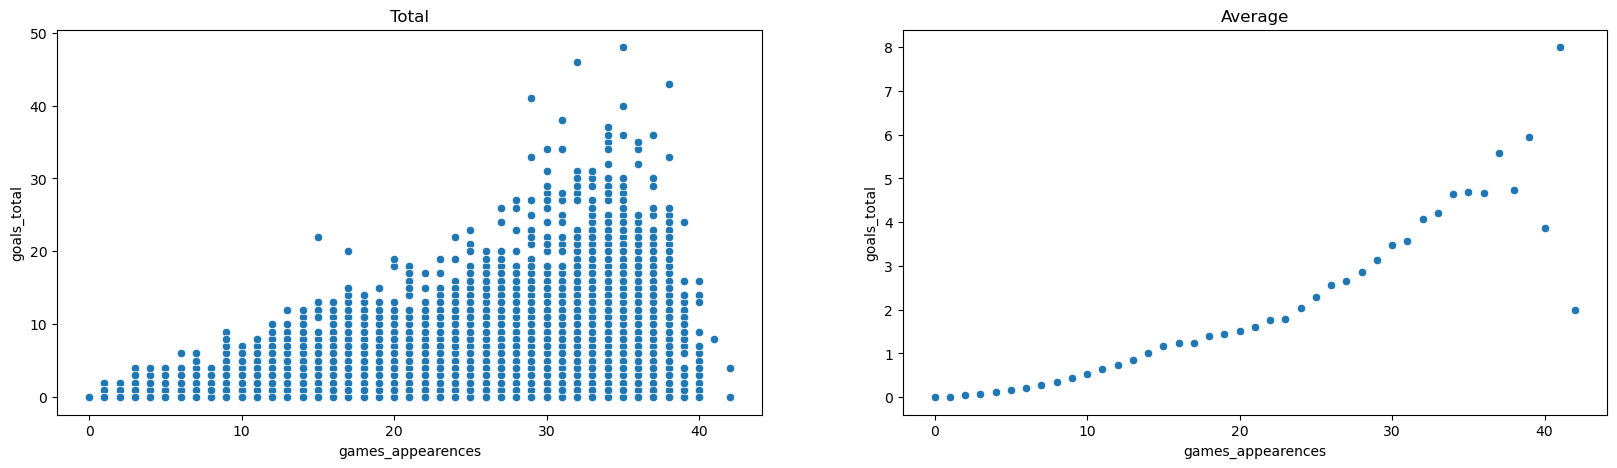

In [339]:
fScatter(dfFootball, dfFootball.drop('goals_total', axis=1).columns.to_list()[10], 'goals_total', 2, 20, 5)

In [318]:
dfFootball.groupby('player_height')[['goals_total']].mean().reset_index()

dfFootball[dfFootball.player_height == 186].shape

(3315, 48)

- **player_id** - interesting pattern, number of goals per season decreases for players with higher id. At first glance, you can think players are added based on theitr birth date. However, I quickly checked the data and noticed players are not added based on their age. It seems like they were added based on their performance or popularity or something like that. For example:
|player_id|birth_date|
|---|---|
|2|1987-09-18|
|3|1995-09-20|
|4|2001-02-27|
|368230|2006-05-05|
|373985|1993-04-03|
|396666|1974-04-27| 
- **player_age** - expected pattern, players score more goals when they are 25-35 years old and less when younger or older.
- **player_birth_place** - there is a slight dependency on how many players score based on their birth place. It probably depends on their country of origin.
- **player_birth_country** - the dependency is stronger here, it proves the statement above.
- **player_nationality** - the same as *player_birth_country*.
- **player_height** - on the one hand, players should be taller to score more goals. On the other hand, it is very similar to the height distribution (mean - 180cm, 25% - 178, 75% - 187). However, being taller is still very important to get high balls. There are 2 outliers: 163cm and 201cm. They are caused by the low number of records for the respective height.
- **player_weight** - the logic would be exactly the same as the above. To score more goals a player needs more weight but not too much. As we see on the average chart, in the range of 60-90. Again, the same explanation for the outliers.
- **league_id** - in some leagues players score more goals than in others.
- **team_id** - it is very important in which team you play, better team - more goals.
- **games_appearences** - positive linear relation, more games players play - more chances to score a goal.
 'games_lineups',
 'games_minutes',
 'games_position',
 'substitutes_in',
 'substitutes_out',
 'substitutes_bench',
 'shots_total',
 'shots_on',
 'goals_conceded',
 'goals_assists',
 'goals_saves',
 'passes_total',
 'passes_key',
 'passes_accuracy',
 'tackles_total',
 'tackles_blocks',
 'tackles_interceptions',
 'duels_total',
 'duels_won',
 'dribbles_attempts',
 'dribbles_success',
 'fouls_drawn',
 'fouls_committed',
 'cards_yellow',
 'cards_yellowred',
 'cards_red',
 'penalty_won',
 'penalty_commited',
 'penalty_scored',
 'penalty_missed',
 'penalty_saved',
 'team_founded',
 'venue_id',
 'venue_city',
 'venue_capacity',
 'venue_surface'

Ad-hoc code to check the above

In [333]:
# Check player id
dfTemp = dfFootballCSV[['player_id','player_birth_date']]

# Check player height
dfTemp = dfFootball.groupby('player_height')[['goals_total']].mean().reset_index()
dfFootball[dfFootball.player_height.isin(dfTemp[dfTemp.goals_total > 2.9]['player_height'])].shape

# Check weight
dfTemp = dfFootball.groupby('player_weight')[['goals_total']].mean().reset_index()
dfFootball[dfFootball.player_weight.isin(dfTemp[dfTemp.goals_total > 1.6]['player_weight'])].shape

(955, 48)

Drop columns based on the analysis above

- **player_id** - id field, a lot of distinct values.
- **player_birth_place** - many distinct values, plus there is 
player_birth_country which can be used better (fewer distinct values and more influence on players' skills).

In [ ]:
dfFootball = dfFootball.drop(['player_id','player_birth_place'], axis=1)

## Conclusion

> - Distribution of the number of teams in a league and the number of players in a team follows the expected ones.

# Statistical analysis

## Correlation

### Remove highly correlated features

# Other

In [137]:
sql = '''
select distinct team_id
from dfFootball 
'''

sql = '''
select distinct player_birth_country
from dfPlayersCSV 
'''



sqldf(sql)

player_birth_country
0                 Greece
1                 France
2                   Mali
3                 Brazil
4               Cameroon
..                   ...
169   Bosnia-Herzegovina
170       CÃ´te d'Ivoire
171           Montserrat
172            St. Lucia
173       Chinese Taipei

[174 rows x 1 columns]